# FLIGHT BOOKING PRICE PREDICTION

**PROBLEM STATEMENT -**

The objective is to analyze the flight 
booking dataset obtained from a 
platform which is used to book flight 
tickets. A thorough study of the data 
will aid in the discovery of valuable 
insights that will be of enormous 
value to passengers. Apply EDA, 
statistical methods and Machine 
learning algorithms in order to get 
meaningful information from it. 


Flight booking price prediction dataset contains around 3 lacs records with 11 attributes 

## 1. Importing the Libraries

We start off this project by importing all the necessary
libraries that will be required for the process

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Data

Loading the data and removing unnecessary column from the dataframe


In [253]:
df = pd.read_csv('Flight_Booking.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [254]:
df =  df.drop(columns = ['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Checking the shape of a dataframe and datatypes of 
all columns along with calculating the statistical 
data

In [255]:
df.shape

(300153, 11)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


No nulls in our data

In [257]:
df.describe()


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


As in 'duration' column 75 percentile of data lie under 16 and still it's max is too high which is 49, means the column may contain outliers. But before we make that statement, we need to perform some analysis to be sure. Same goes for price column.

### Missing Values

Checking out the missing values in a dataframe

In [258]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## 3. Data Visualization

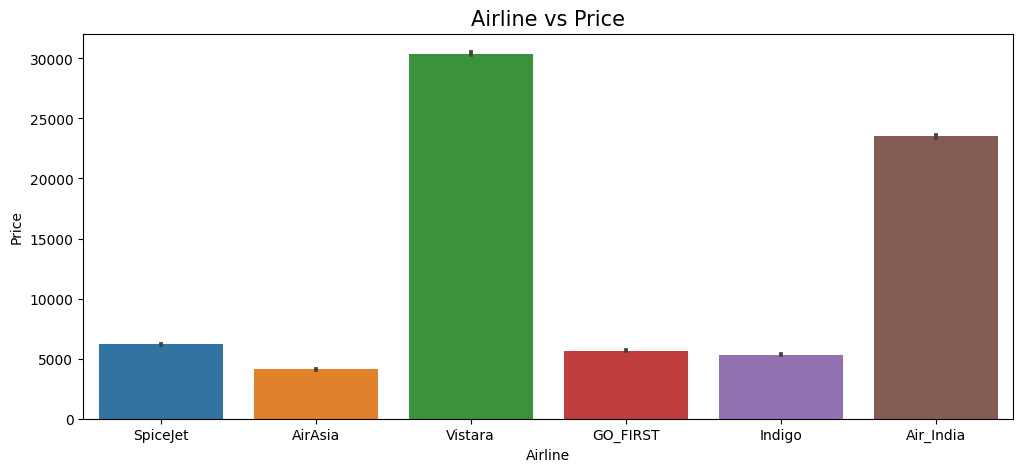

In [259]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['airline'],y=df['price'])
plt.title("Airline vs Price", fontsize=15)
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

There is a variation in price with 
different airlines. Vistara seems to be the priciest and AirAsia the cheapest.

In [260]:
counts = df['flight'].value_counts().nlargest(10)
top_df = df[df['flight'].isin(counts.index)]
sorted_flight = top_df['flight'].value_counts().sort_values(ascending=False).index.tolist()
fig = px.histogram(top_df, x='flight', color='flight', color_discrete_sequence=px.colors.sequential.Viridis, category_orders={"flight": sorted_flight})
fig.update_layout(title_text='Count of top 10 flights', xaxis_title='Flight', yaxis_title='Count')
fig.show()

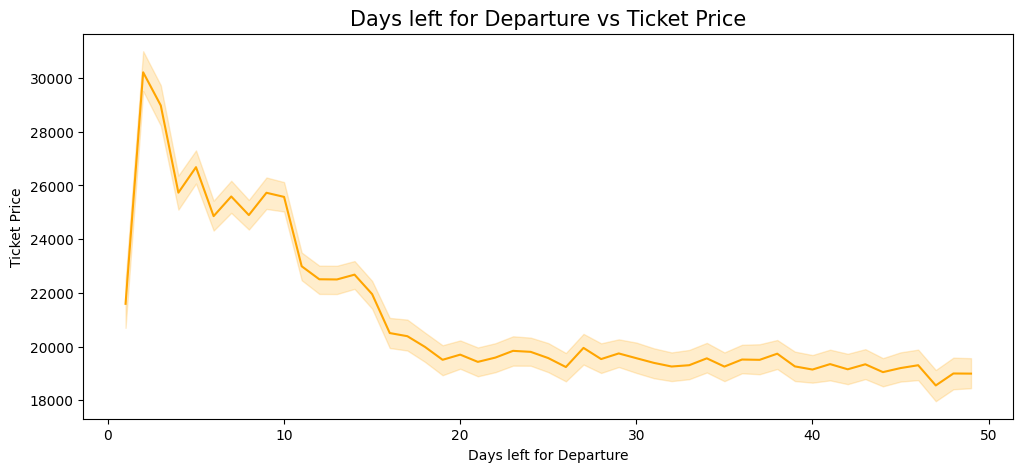

In [261]:
plt.figure(figsize=(12,5))
sns.lineplot(x=df['days_left'],y=df['price'],color='orange')
plt.title("Days left for Departure vs Ticket Price", fontsize=15)
plt.xlabel("Days left for Departure")
plt.ylabel("Ticket Price")
plt.show()

The price of the ticket 
increases as the days left for 
departure decreases

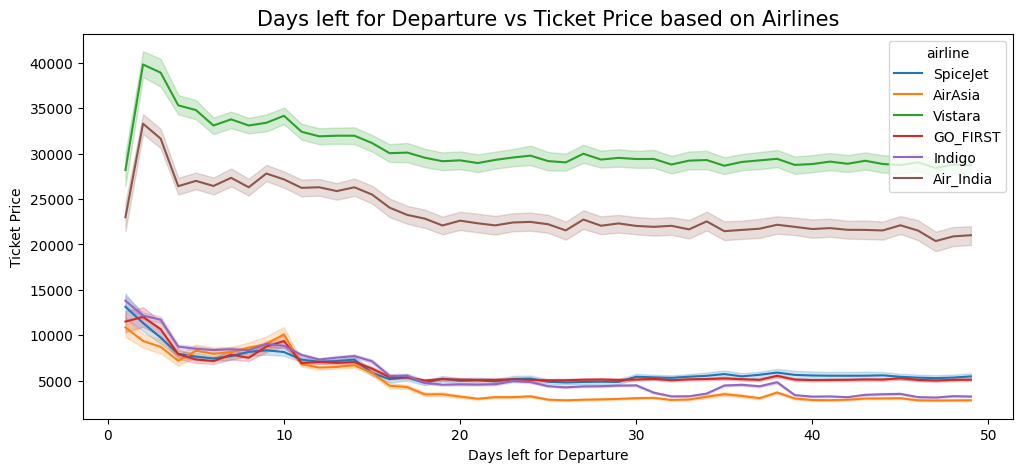

In [262]:
plt.figure(figsize=(12,5))
sns.lineplot(x=df['days_left'], y=df['price'], hue=df['airline'])
plt.title("Days left for Departure vs Ticket Price based on Airlines", fontsize=15)
plt.xlabel("Days left for Departure")
plt.ylabel("Ticket Price")
plt.show()

**Days left for Departure vs Ticket Price based on Arrival or Departure Time**

'\nplt.title("Days left for Departure vs Ticket Price based on Departure Time", fontsize=15)\nplt.xlabel("Days left for Departure")\nplt.ylabel("Ticket Price")\nplt.show()\n'

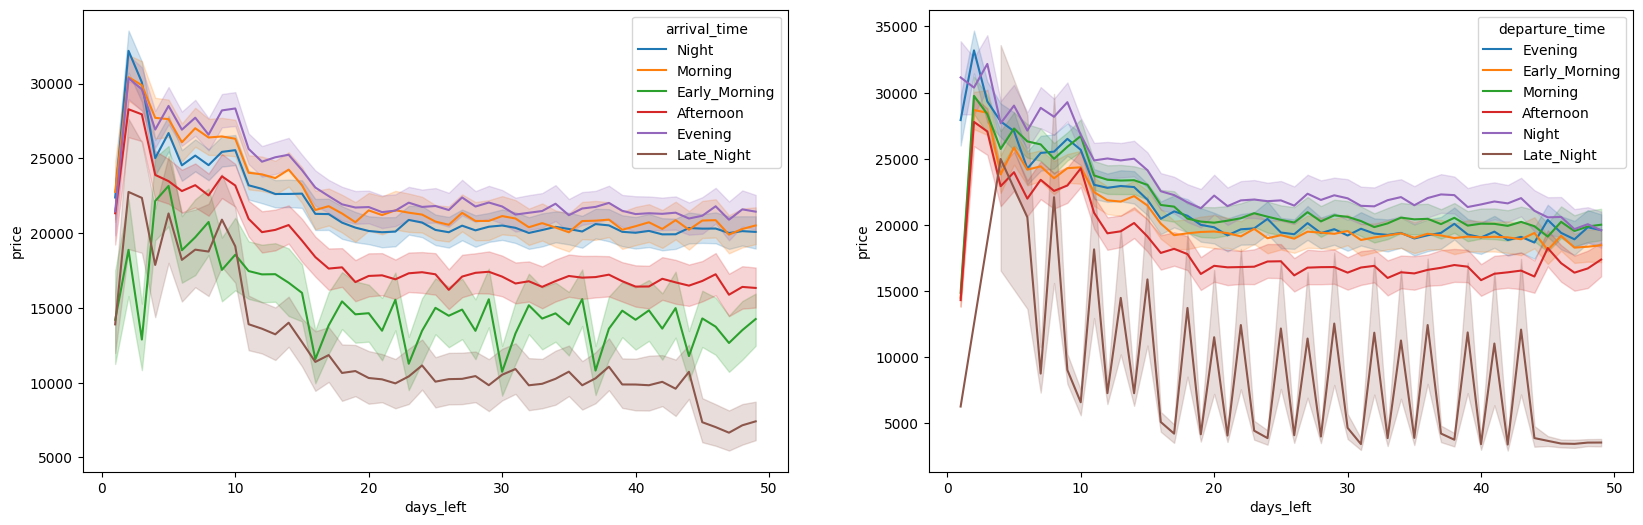

In [263]:
fig,ax = plt.subplots(1,2,figsize=(20,6))

sns.lineplot(x=df['days_left'], y=df['price'], hue=df['arrival_time'],ax=ax[0])

sns.lineplot(x=df['days_left'], y=df['price'], hue=df['departure_time'], ax=ax[1])

'''
plt.title("Days left for Departure vs Ticket Price based on Departure Time", fontsize=15)
plt.xlabel("Days left for Departure")
plt.ylabel("Ticket Price")
plt.show()
'''

Late night departure times have lower prices compared to other departure times but prices for late night arrival times are higher than evening arrivals.

Air India and Vistara are the most expensive airlines, and prices decrease as the days left for departure increase. 

(Similarly, you can plot for other columns as well by just changing the hue)

**Range of price of all the flights of Economy and Business class**

<Axes: xlabel='class', ylabel='price'>

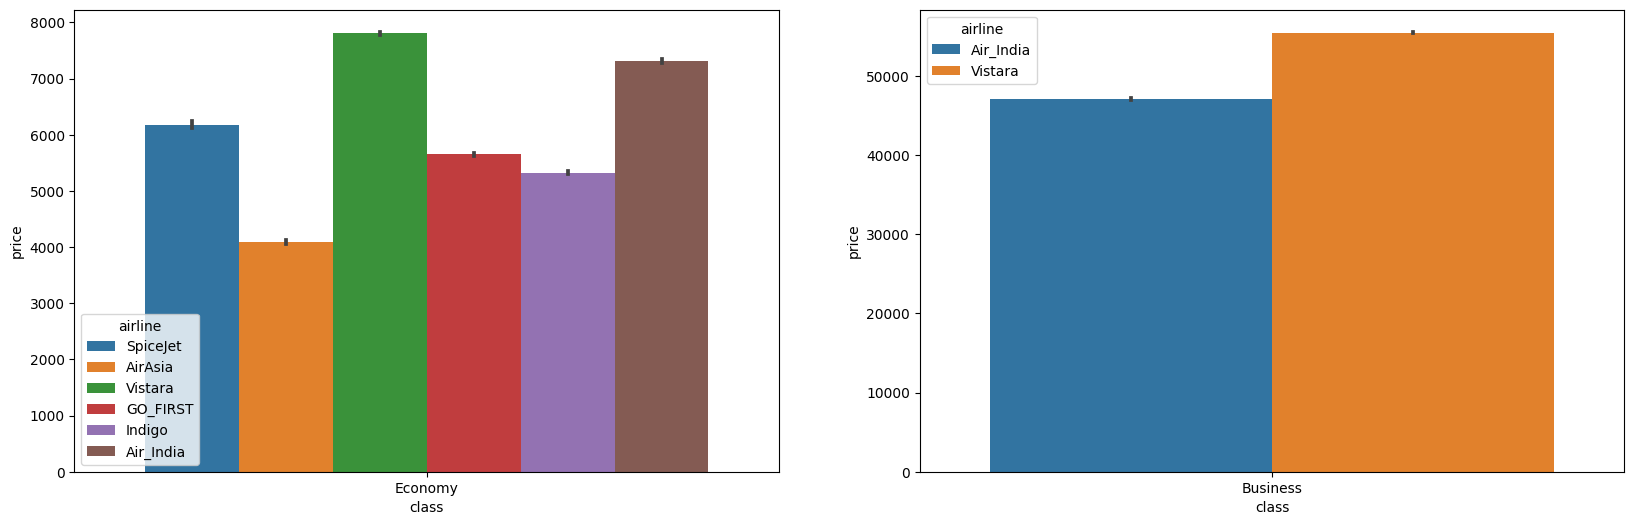

In [264]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
#plt.figure(figsize=(15,5))

df_e = df[df['class']=='Economy']
sns.barplot(x=df_e['class'],y=df_e['price'],hue=df_e['airline'],ax=ax[0])

df_b = df[df['class']=='Business']
sns.barplot(x=df_b['class'],y=df_b['price'],hue=df_b['airline'],ax=ax[1])

<Axes: xlabel='days_left', ylabel='price'>

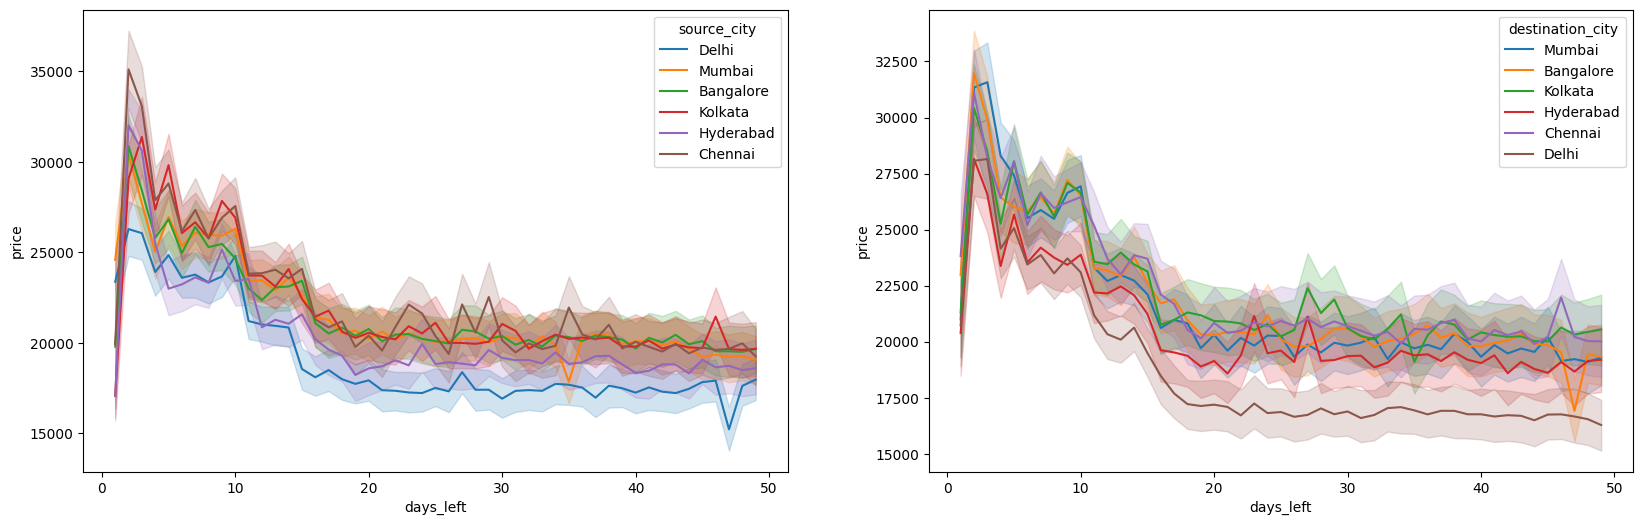

In [265]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x=df['days_left'],y=df['price'],hue=df['source_city'],ax=ax[0])
sns.lineplot(x=df['days_left'],y=df['price'],hue=df['destination_city'],ax=ax[1])

**Range of price of flights with source and destination city according to the days left**


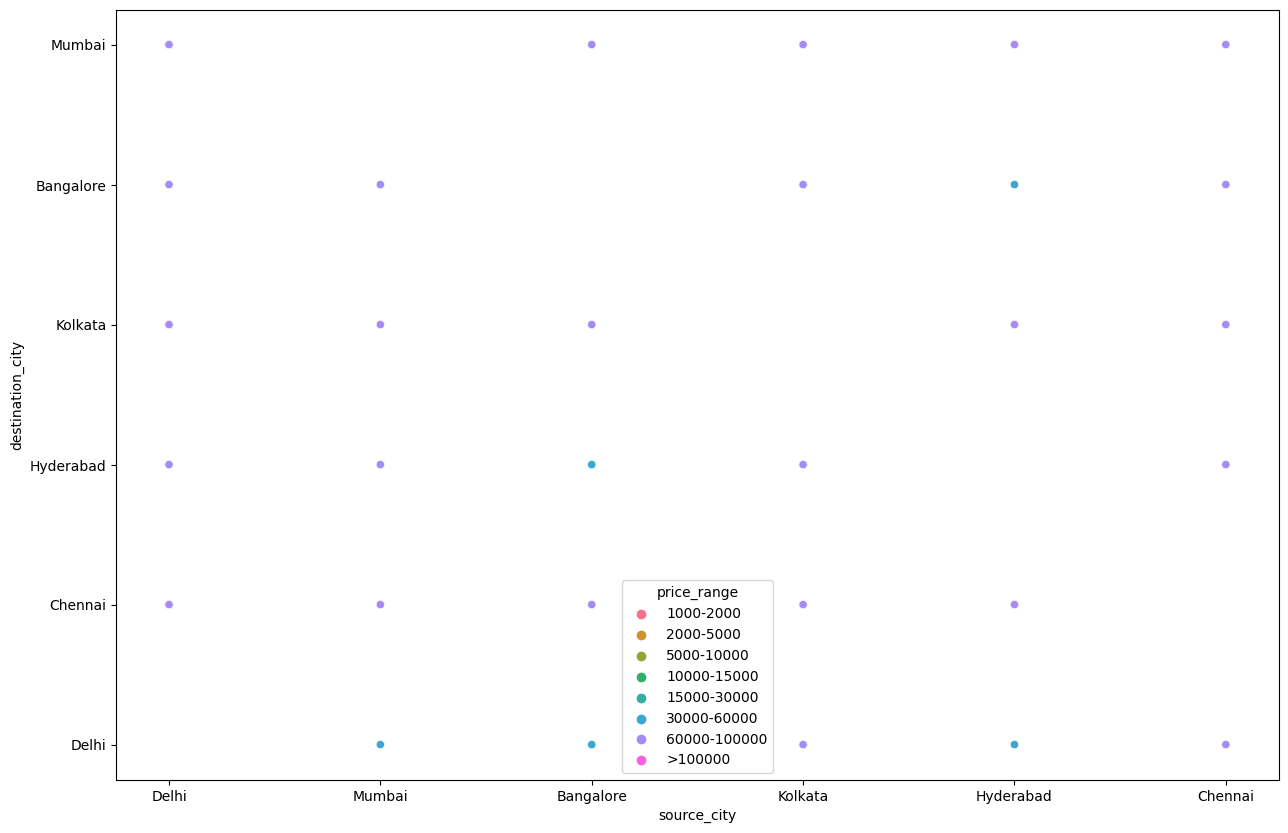

In [266]:
df_new=df.copy()
plt.figure(figsize=(15,10))

price_ranges = [1000, 2000, 5000, 10000, 15000, 30000, 60000, 100000, float('inf')]
price_labels = ['1000-2000', '2000-5000', '5000-10000', '10000-15000', '15000-30000', '30000-60000', '60000-100000', '>100000']

#sns.scatterplot(data=df_new, x='source_city', y='destination_city', hue=)

df_new['price_range'] = pd.cut(df_new['price'], bins=price_ranges, labels=price_labels)

size_values = [100,200,300,400,500,600,700,800]
price_sizes = dict(zip(price_ranges[:-1], size_values))

# Map the price range to its corresponding size value
df_new['price_size'] = df_new['price'].apply(lambda x: next((price_sizes[k] for k in price_sizes.keys() if k <= x), size_values[-1]))

# Define a custom color palette using seaborn's color palette generator
palette = sns.color_palette('husl', len(price_ranges)-1)

# Create the scatter plot with the custom color palette and dot sizes
sns.scatterplot(data=df_new, x='source_city', y='destination_city', hue='price_range', palette=palette, sizes=df_new['price_size'])

# Show the plot
plt.show()

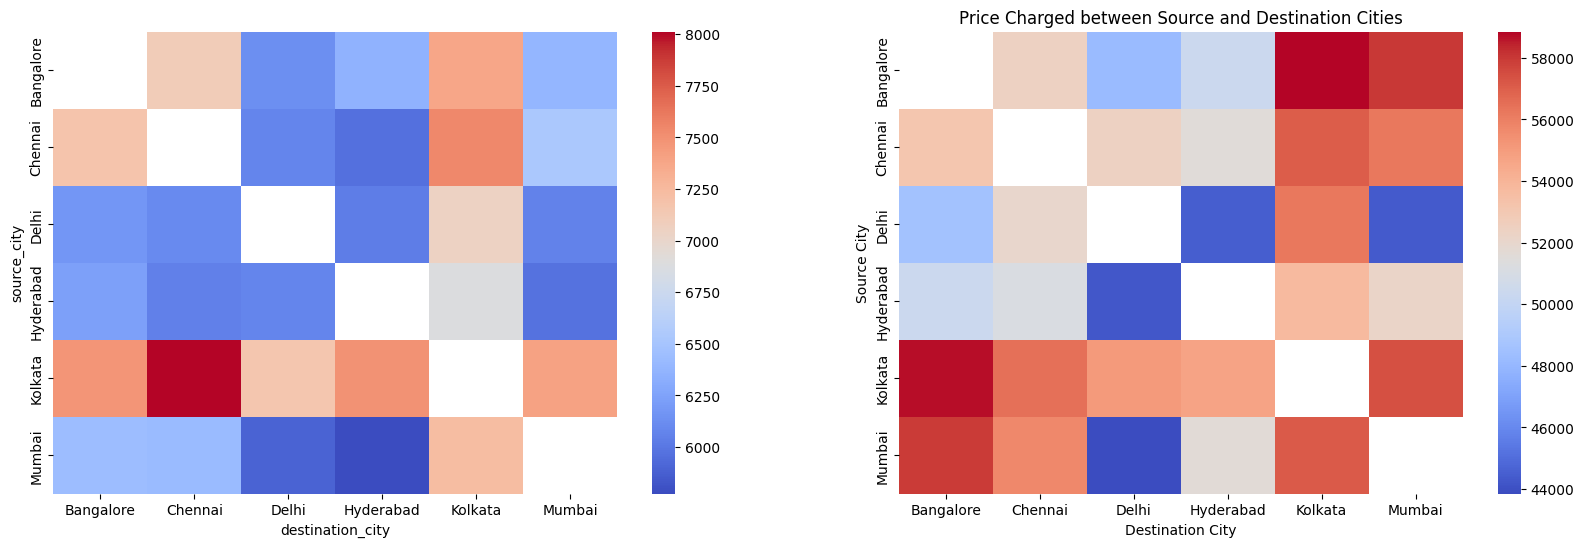

In [267]:
fig,ax = plt.subplots(1,2,figsize=(20,6))

# Aggregate the duplicate rows by taking the mean of the prices
data_e=df[df['class']=='Economy'].copy()
data_b=df[df['class']=='Business'].copy()
data_e = data_e.groupby(['source_city', 'destination_city']).mean().reset_index()

# Pivot the data to create a matrix of prices between each source and destination
matrix1 = data_e.pivot('source_city', 'destination_city', 'price')
# Create the heatmap using Seaborn
sns.heatmap(matrix1, cmap='coolwarm',ax=ax[0])

data_b = data_b.groupby(['source_city', 'destination_city']).mean().reset_index()

# Pivot the data to create a matrix of prices between each source and destination
matrix2 = data_b.pivot('source_city', 'destination_city', 'price')
# Create the heatmap using Seaborn
sns.heatmap(matrix2, cmap='coolwarm',ax=ax[1])

# Add labels and title to the heatmap
plt.xlabel('Destination City')
plt.ylabel('Source City')
plt.title('Price Charged between Source and Destination Cities')

# Show the heatmap
plt.show()

<Axes: xlabel='source_city', ylabel='mean_total_bill'>

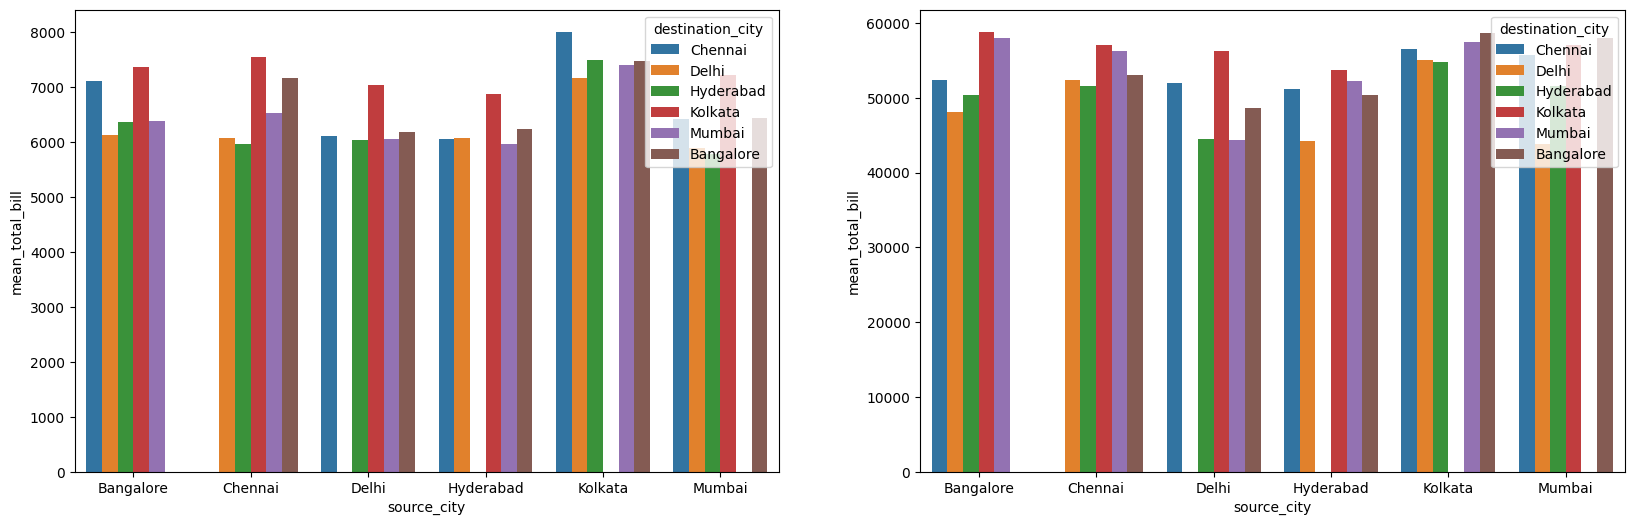

In [268]:
fig,ax = plt.subplots(1,2,figsize=(20,6))

df_economy = df[df['class']=='Economy']
df_business = df[df['class']=='Business']

# perform groupby
df_economy = df_economy.groupby(['source_city', 'destination_city']).agg(mean_total_bill=("price", 'mean'))
df_economy = df_economy.reset_index()

# perform groupby
df_business = df_business.groupby(['source_city', 'destination_city']).agg(mean_total_bill=("price", 'mean'))
df_business = df_business.reset_index()
  
# plot barplot
sns.barplot(x="source_city",
           y="mean_total_bill",
           hue="destination_city",
           data=df_economy,
           ax=ax[0])

# plot barplot
sns.barplot(x="source_city",
           y="mean_total_bill",
           hue="destination_city",
           data=df_business,
           ax=ax[1])

Economy Class - We can see flight from Kolkata to any other city is significantly high on average (>7000). While less from cities like Hyderabad and Delhi

Business Class - We can see flights from both Kolkata and Mumbai to any other city is significantly high on average (>50000) and again less for cities like Hyderabad and Delhi

**Visualization of categorical features with countplot**


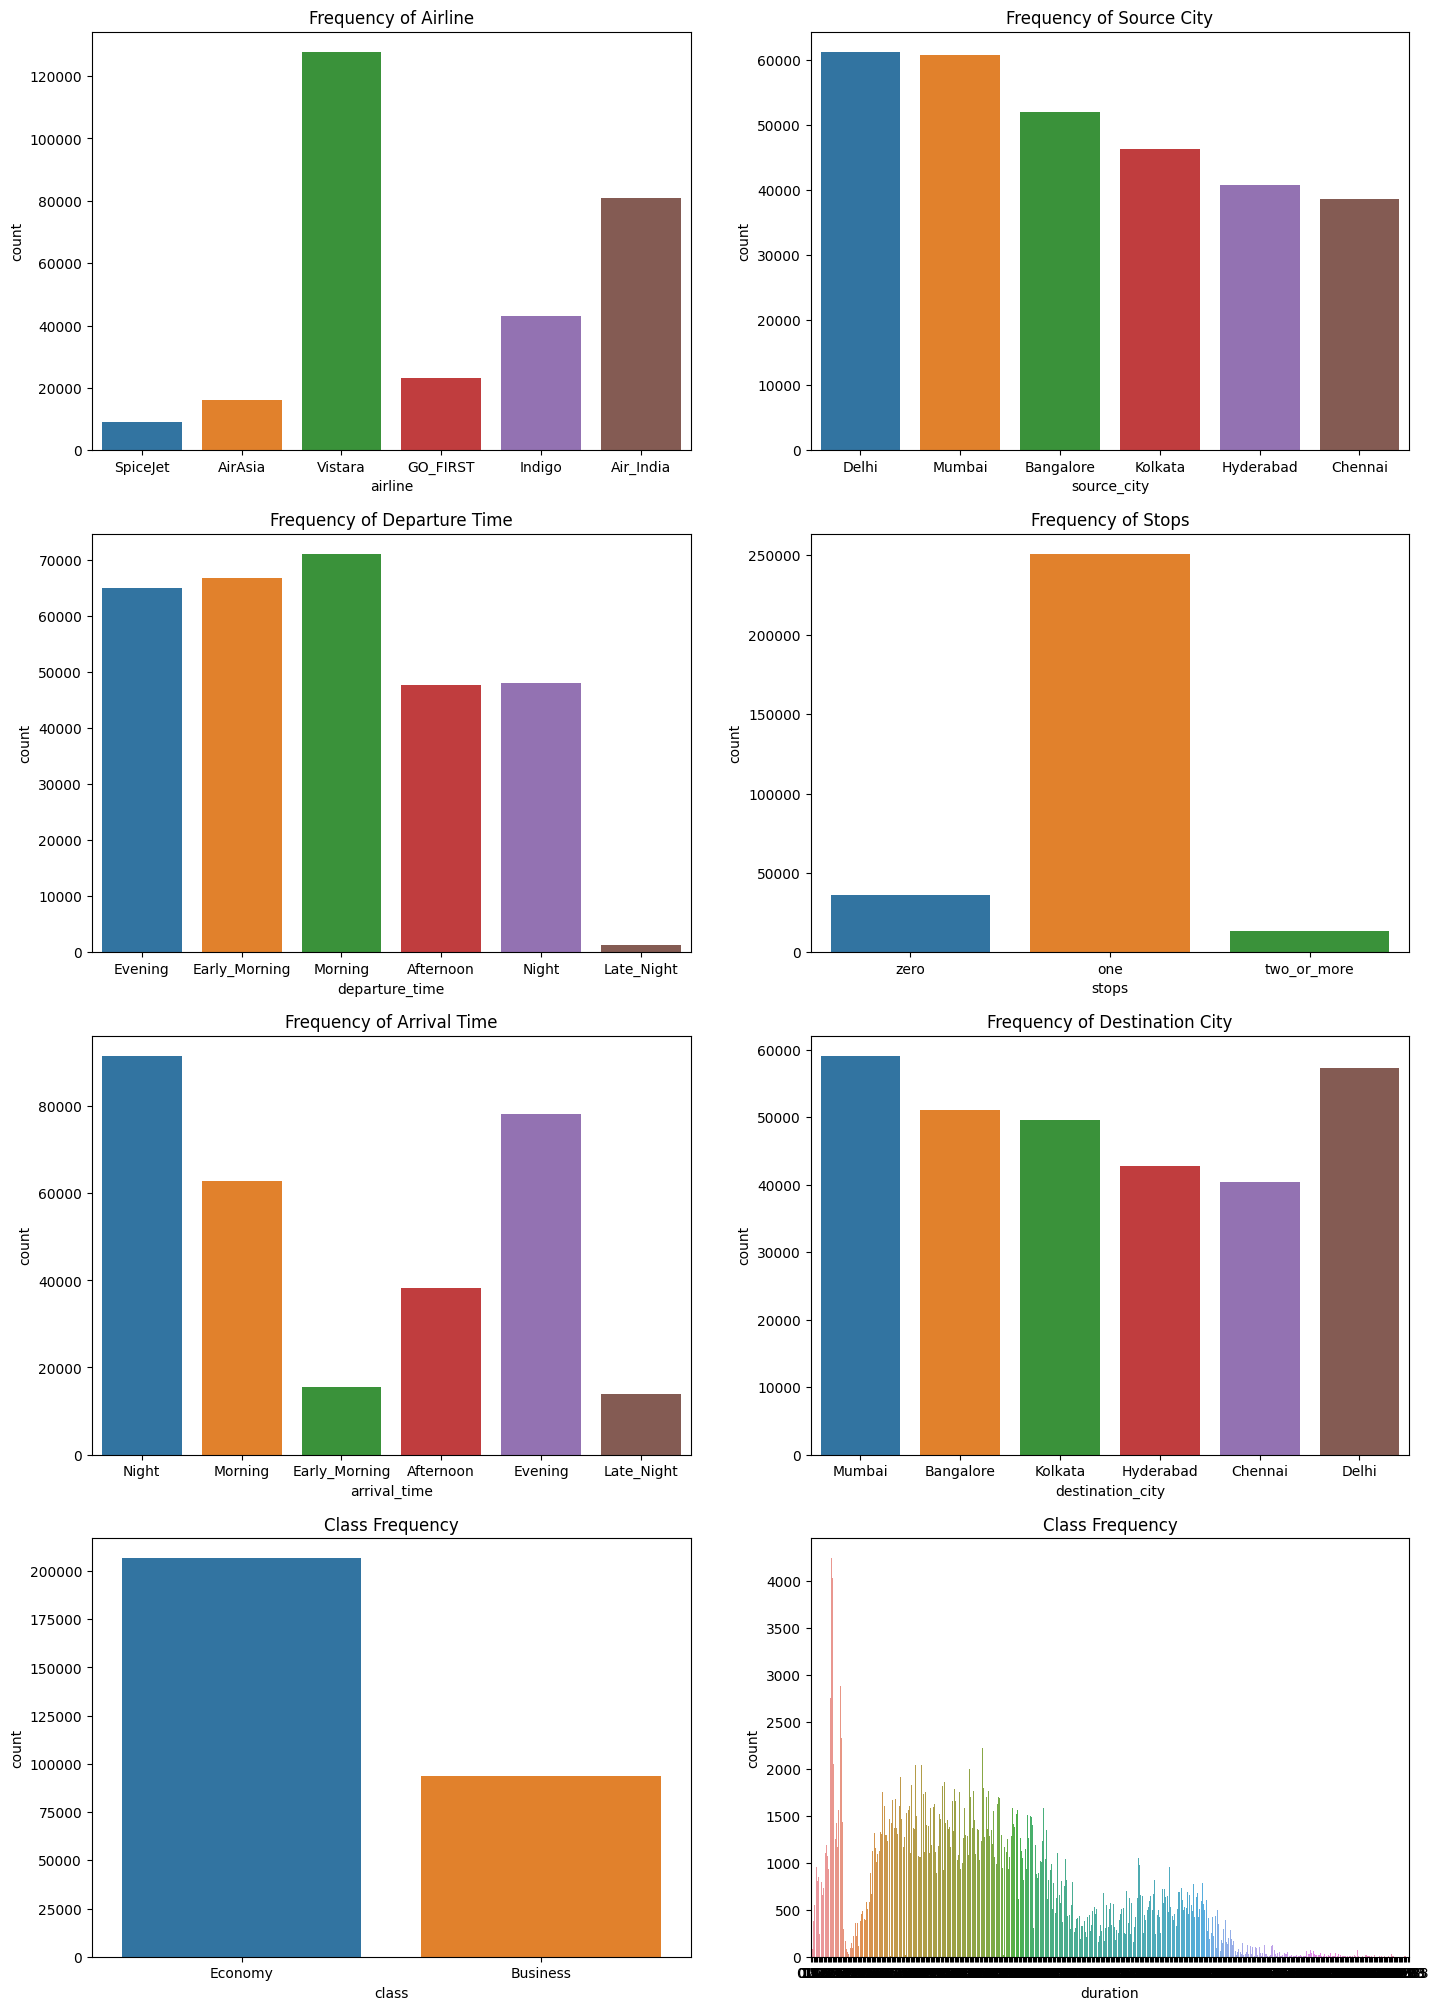

In [269]:
plt.figure(figsize=(17,25))

plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df) 
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df) 
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df)
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df) 
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df) 
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")

plt.subplot(4, 2, 8)
sns.countplot(x=df["duration"], data=df)
plt.title("Class Frequency")

plt.show()

**Average Duration of Each Flight**

In [270]:
airline_duration = df.groupby('airline')['duration'].mean().sort_values(ascending = False).reset_index()
fig = px.bar(airline_duration, x='airline', y='duration', color='airline', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Avg duartion of each airline', xaxis_title='Airline', yaxis_title='Duration')
fig.show()

## 4. Data Preprocessing

### Min Max *Scaler*

In [271]:
scaler = MinMaxScaler()
df['duration'] = scaler.fit_transform(df[['duration']])

Above, I am using Min Max Scaler as this column is not gaussian distribution and has continuous data.

### One Hot Encoding

In [272]:
le = LabelEncoder()
df = df.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)

In [273]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,0.027347,1,5953
1,4,1387,2,1,2,4,5,1,0.030612,1,5953
2,0,1213,2,1,2,1,5,1,0.027347,1,5956
3,5,1559,2,4,2,0,5,1,0.028980,1,5955
4,5,1549,2,4,2,4,5,1,0.030612,1,5955


Here, we can see we have converted all the object dtypes to integer dtypes using One Hot Encoding. But, technically, we should have dropped the 'flight' feature column as it has too many unique values to convert. It occurs "curse of dimensionality" and make our models more complex and harder to train, hence, we should avoid it. We'll see more about it later on.

In [274]:
''' from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df:
  if (df[column].dtype == 'O') & (column != 'flight'):
    df[column] = le.fit_transform(df[column])
'''

" from sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\n\nfor column in df:\n  if (df[column].dtype == 'O') & (column != 'flight'):\n    df[column] = le.fit_transform(df[column])\n"

In [275]:
'''
# Only use if you want to do 'Target Encoding' on 'flight' column

# create a sample dataset with a categorical variable and a target variable
df_new=df[['flight', 'price']]

# compute the target mean for each category
target_means = df_new.groupby('flight')['price'].mean()

# create a new column with the target mean encoding for each category
df_new['Target_Encoded'] = df_new['flight'].map(target_means)

# display the resulting dataset with the target-encoded variable
print(df_new)

'''

"\n# Only use if you want to do 'Target Encoding' on 'flight' column\n\n# create a sample dataset with a categorical variable and a target variable\ndf_new=df[['flight', 'price']]\n\n# compute the target mean for each category\ntarget_means = df_new.groupby('flight')['price'].mean()\n\n# create a new column with the target mean encoding for each category\ndf_new['Target_Encoded'] = df_new['flight'].map(target_means)\n\n# display the resulting dataset with the target-encoded variable\nprint(df_new)\n\n"

## 5. Feature Selection

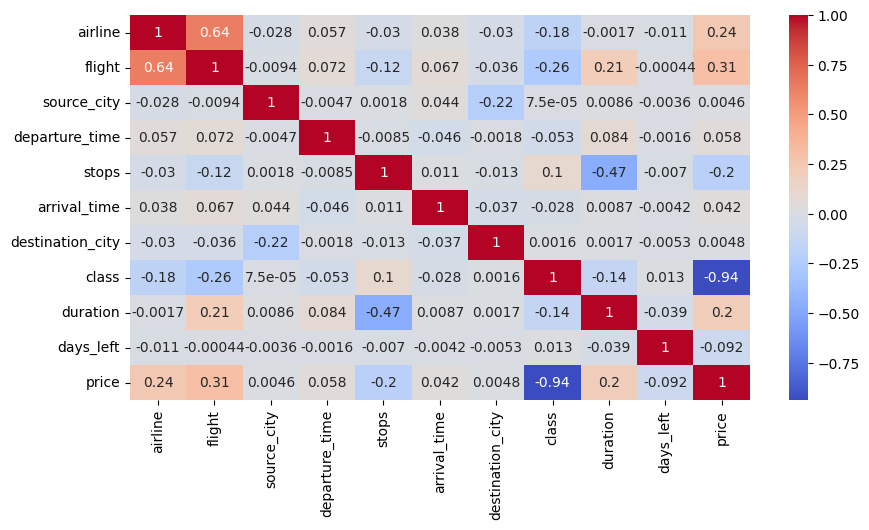

In [276]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [277]:
def vif_func(df):
  col_list = []
  for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
      col_list.append(col)
  X = df[col_list]
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  vif_data["VIF"] = [variance_inflation_factor (X.values, i)
                   for i in range(len(X.columns))]

  print(vif_data)

In [278]:
vif_func(df)

            feature        VIF
0           airline   6.706043
1            flight  12.603480
2       source_city   2.963013
3    departure_time   2.801068
4             stops   1.444284
5      arrival_time   3.778377
6  destination_city   2.911142
7             class   2.846505
8          duration   4.361875
9         days_left   4.065693


Selecting the features using VIF. VIF should be less than 5. Therefore, we'll be dropping 'flight' feature here.

In [279]:
df = df.drop(['flight'], axis = 1)

In [280]:
vif_func(df)

            feature       VIF
0           airline  3.382485
1       source_city  2.918101
2    departure_time  2.772544
3             stops  1.433779
4      arrival_time  3.673012
5  destination_city  2.874637
6             class  2.844549
7          duration  3.795514
8         days_left  3.965396


You can see VIF of other features have also been decreased significantly as the 'flight' column must have had an impact on other columns as well due to its hidden multicollinearity.

## 6. Model Building

In [281]:
X = df.drop(['price'], axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Here i've splitted the data above intro training and testing part. I've kept 80% of my data for training purpose.

In [282]:
sc=StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Above i've used scaling technique once again for better performance of my machine learning algorithm.

In [283]:
models = [LinearRegression(), DecisionTreeRegressor(), BaggingRegressor(), RandomForestRegressor()]

results = {'Model_Name': [], 'Mean_Absolute_Error_MAE': [], 'Mean_Absolute_Percentage_Error_MAPE': [], 
            'Mean_Squared_Error_MSE': [], 'Root_Mean_Squared_Error_RMSE': [], 'R2_score': []}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    
    results['Model_Name'].append(model.__class__.__name__)
    results['Mean_Absolute_Error_MAE'].append(mae)
    results['Mean_Absolute_Percentage_Error_MAPE'].append(mape)
    results['Mean_Squared_Error_MSE'].append(mse)
    results['Root_Mean_Squared_Error_RMSE'].append(rmse)
    results['R2_score'].append(r2)

Results = pd.DataFrame(results)

## 7. Model Evaluation

In [284]:
Results.head()

,Model_Name,Mean_Absolute_Error_MAE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Error_RMSE,R2_score
0,LinearRegression,4614.085749,43.909537,4.845446e+07,6960.923842,0.905236
1,DecisionTreeRegressor,1157.722926,7.516814,1.187109e+07,3445.445129,0.976783
2,BaggingRegressor,1109.108738,7.352059,7.966421e+06,2822.484924,0.984420
3,RandomForestRegressor,1076.752330,7.074756,7.457600e+06,2730.860633,0.985415


In [285]:
x = ['LinearRegression', 'DecisionTreeRegressor', 'BaggingRegressor', 'RandomForestRegressor']

# Create subplots
fig = sp.make_subplots(rows=3, cols=2, subplot_titles=("Model Name VS MAE", "Model VS MAE %", "Model Name VS MSE", "Model Name VS RMSE", "Model Name VS R Squared"))

# Create a color scale for the categories
colors = {'LinearRegression': 'rgb(255, 0, 0)', 'DecisionTreeRegressor': 'rgb(0, 255, 0)', 'BaggingRegressor': 'rgb(0, 0, 255)', 'RandomForestRegressor': 'rgb(255, 255, 0)'}

# Add bar plots to the subplots
fig.add_trace(go.Bar(x = Results['Model_Name'], y = Results['Mean_Absolute_Error_MAE'], name=" ", base = Results['Model_Name'], marker=dict(color=[colors[c] for c in x]), showlegend=False), row=1, col=1)
fig.add_trace(go.Bar(x = Results['Model_Name'], y = Results['Mean_Absolute_Percentage_Error_MAPE'], name=" ", base = Results['Model_Name'], marker=dict(color=[colors[c] for c in x]), showlegend=False), row=1, col=2)
fig.add_trace(go.Bar(x = Results['Model_Name'], y = Results['Mean_Squared_Error_MSE'], name="", base = Results['Model_Name'], marker=dict(color=[colors[c] for c in x]), showlegend=False), row=2, col=1)
fig.add_trace(go.Bar(x = Results['Model_Name'], y = Results['Root_Mean_Squared_Error_RMSE'], name="", base = Results['Model_Name'], marker=dict(color=[colors[c] for c in x]), showlegend=False), row=2, col=2)
fig.add_trace(go.Bar(x = Results['Model_Name'], y = Results['R2_score'], name="", base = Results['Model_Name'], marker=dict(color=[colors[c] for c in x]), showlegend=False), row=3, col=1)

# Update layout
fig.update_layout(height=1000, width=900, title_text="Subplots of Bar Plots")
fig.update_layout

fig.show()

## Conclusion

The dataset contains information on flight duration, days left for departure, price, airline, source city, departure and arrival times, number of stops, destination city, and travel class. Among the airlines, **Vistara** has the highest number of flights, while **SpiceJet** has the lowest. **Delhi** is the most popular source city, and **Mumbai** is the most popular destination city. **Economy class** is the most preferred travel class, and **Air India** and **Vistara** are the most expensive airlines. Flights with **no stops** have the shortest average duration, while flights with **2 or more stops** have the longest. **Morning departure times** and **evening arrival times** have the highest average prices, while **late night departure and arrival times** have the lowest. **Business class** tickets are more expensive than economy class tickets. The **Random Forest Regressor** model performed the best with the least mean absolute error and highest R2 score.



## ---



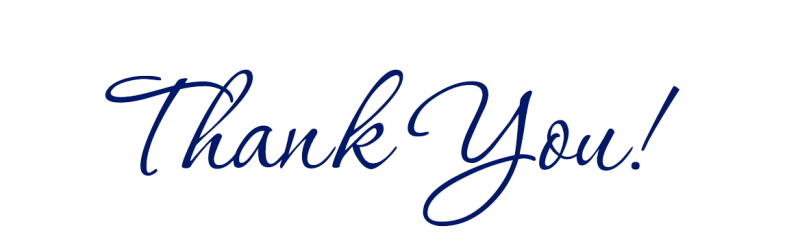